In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the dataset
data = pd.read_csv('../raw_data/data_cleaned_2021.csv')
data.head(2)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M


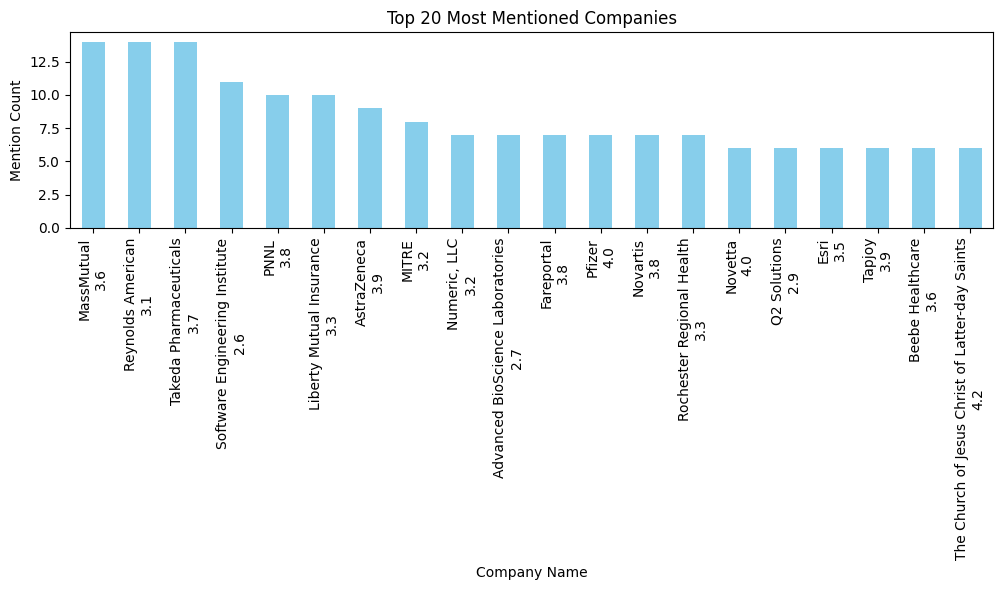

In [2]:
# 1. Top 20 Most Mentioned Companies
top_20_most_mentioned_companies = data['Company Name'].value_counts().head(20)

# Plotting
plt.figure(figsize=(10, 6))
top_20_most_mentioned_companies.plot(kind='bar', color='skyblue')
plt.title('Top 20 Most Mentioned Companies')
plt.xlabel('Company Name')
plt.ylabel('Mention Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

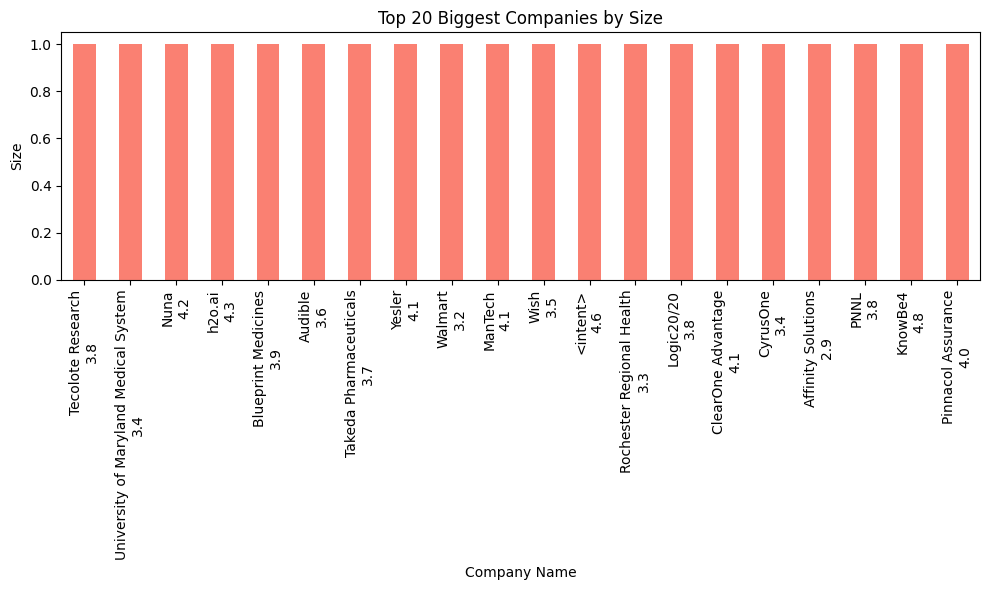

In [3]:
### 2. Top 20 of the Biggest Companies
# Cleaning and standardizing the Size column to extract numerical values for sorting
size_mapping = {
    '1 to 50 employees': 50,
    '51 to 200 employees': 200,
    '201 to 500 employees': 500,
    '501 to 1000 employees': 1000,
    '1001 to 5000 employees': 5000,
    '5001 to 10000 employees': 10000,
    '10000+ employees': 10001  # Consider 10000+ as 10001 for sorting purposes
}

data['Size_numeric'] = data['Size'].map(size_mapping)
top_20_biggest_companies = data.sort_values(by='Size_numeric', ascending=False)['Company Name'].head(20)

# Plotting
plt.figure(figsize=(10, 6))
top_20_biggest_companies.value_counts().plot(kind='bar', color='salmon')
plt.title('Top 20 Biggest Companies by Size')
plt.xlabel('Company Name')
plt.ylabel('Size')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



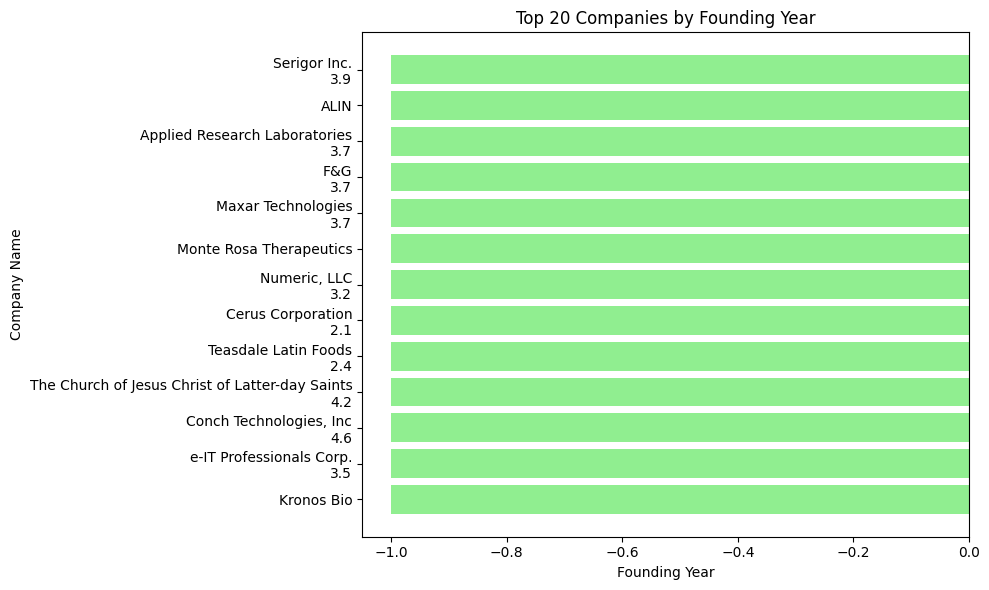

In [4]:
### 3. Top 20 Companies by Founding Year
top_20_founded_companies = data.sort_values(by='Founded', ascending=True)[['Company Name', 'Founded']].dropna().head(20)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_20_founded_companies['Company Name'], top_20_founded_companies['Founded'], color='lightgreen')
plt.title('Top 20 Companies by Founding Year')
plt.xlabel('Founding Year')
plt.ylabel('Company Name')
plt.tight_layout()
plt.show()

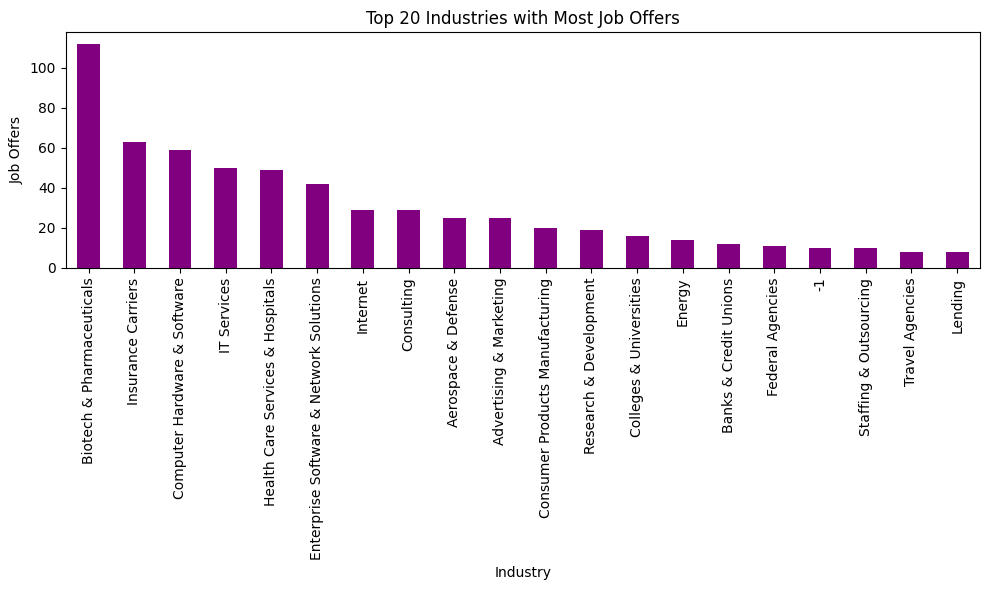

In [5]:
### 4. Top 20 Industries with Most Job Offers
if 'Industry' in data.columns:
    industry_job_offers = data['Industry'].value_counts().head(20)

    # Plotting
    plt.figure(figsize=(10, 6))
    industry_job_offers.plot(kind='bar', color='purple')
    plt.title('Top 20 Industries with Most Job Offers')
    plt.xlabel('Industry')
    plt.ylabel('Job Offers')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()



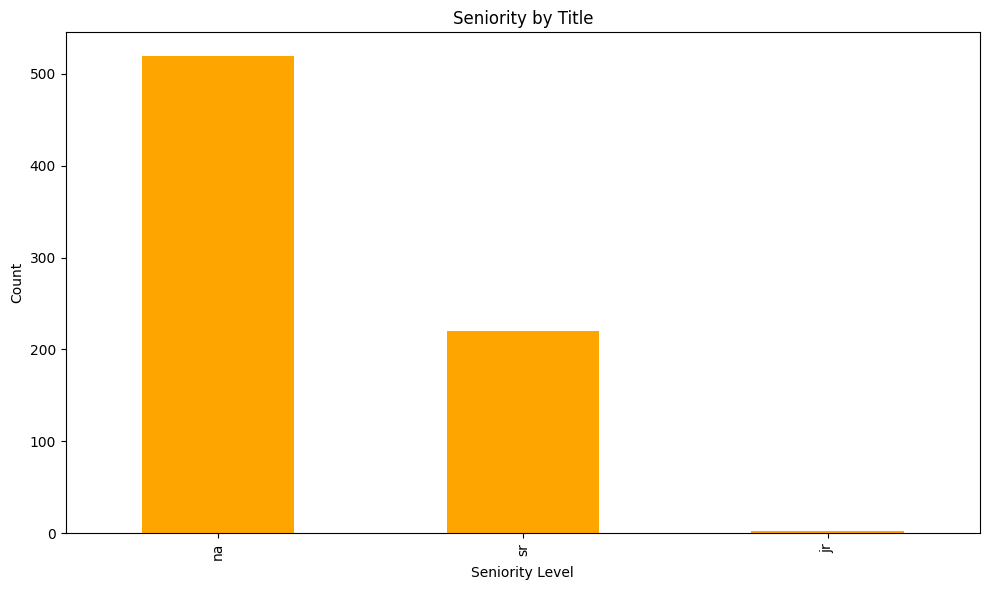

In [6]:
### 5. Seniority by Title: Pie or Bar Chart
seniority_counts = data['seniority_by_title'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
seniority_counts.plot(kind='bar', color='orange')
plt.title('Seniority by Title')
plt.xlabel('Seniority Level')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



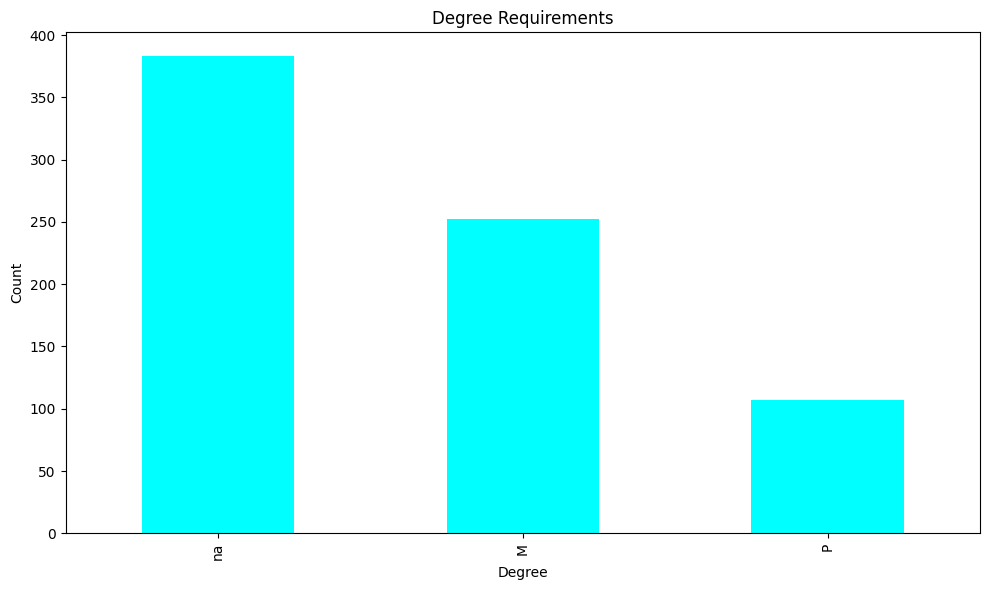

In [7]:
### 6. Degree: Chart (What Does It Mean?)
degree_counts = data['Degree'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
degree_counts.plot(kind='bar', color='cyan')
plt.title('Degree Requirements')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [15]:
# Vérifier les colonnes disponibles
print(data.columns)

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree'],
      dtype='object')


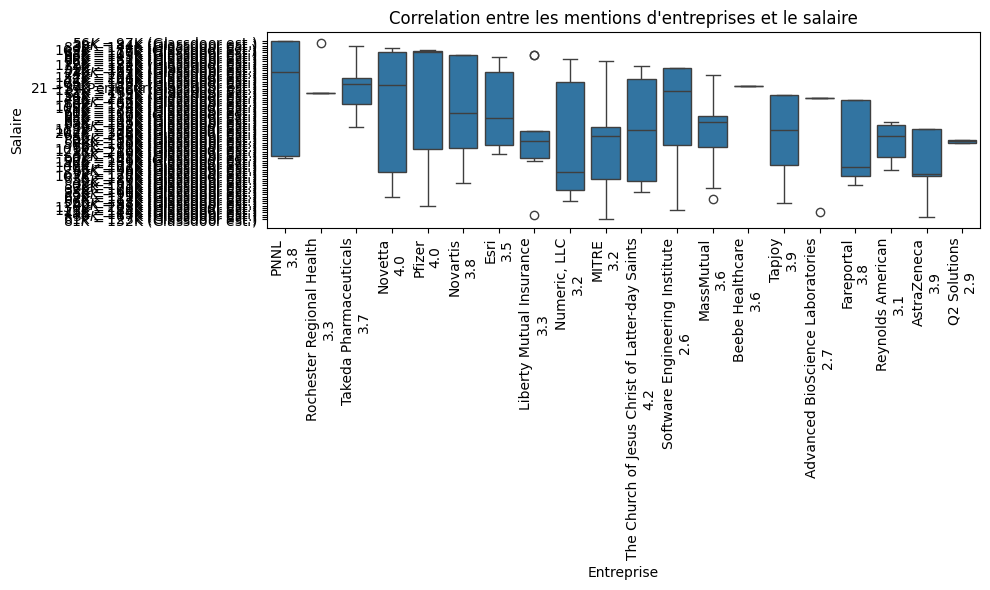

In [18]:
# 1. Correlation entre les mentions d'entreprises et le salaire
top_20_most_mentioned_companies = data['Company Name'].value_counts().head(20).index
mentioned_salaries = data[data['Company Name'].isin(top_20_most_mentioned_companies)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Company Name', y='Salary Estimate', data=mentioned_salaries)
plt.title('Correlation entre les mentions d\'entreprises et le salaire')
plt.xlabel('Entreprise')
plt.ylabel('Salaire')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

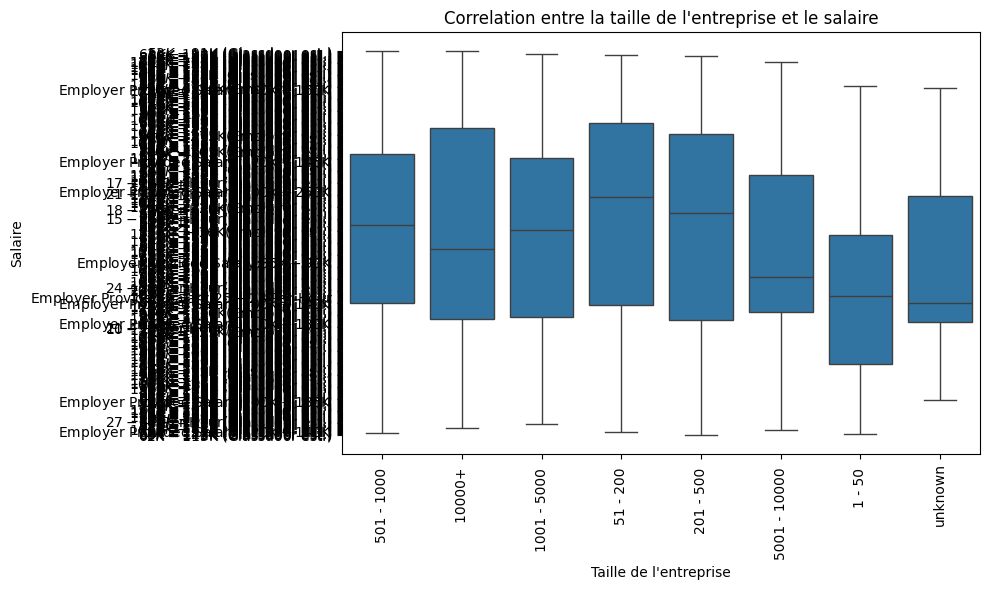

In [19]:
# 2. Correlation entre la taille des entreprises et le salaire
size_mapping = {
    '1 to 50 employees': 50,
    '51 to 200 employees': 200,
    '201 to 500 employees': 500,
    '501 to 1000 employees': 1000,
    '1001 to 5000 employees': 5000,
    '5001 to 10000 employees': 10000,
    '10000+ employees': 10001  # Consider 10000+ as 10001 for sorting purposes
}
data['Size_numeric'] = data['Size'].map(size_mapping)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Size', y='Salary Estimate', data=data)
plt.title('Correlation entre la taille de l\'entreprise et le salaire')
plt.xlabel('Taille de l\'entreprise')
plt.ylabel('Salaire')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

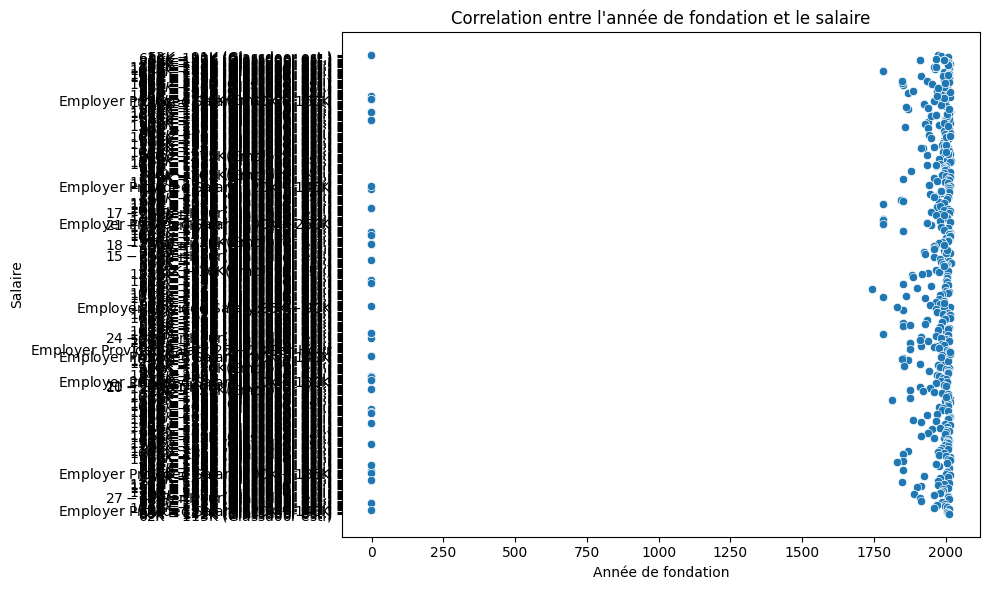

In [20]:
# 3. Correlation entre l'année de fondation et le salaire
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Founded', y='Salary Estimate', data=data)
plt.title('Correlation entre l\'année de fondation et le salaire')
plt.xlabel('Année de fondation')
plt.ylabel('Salaire')
plt.tight_layout()
plt.show()

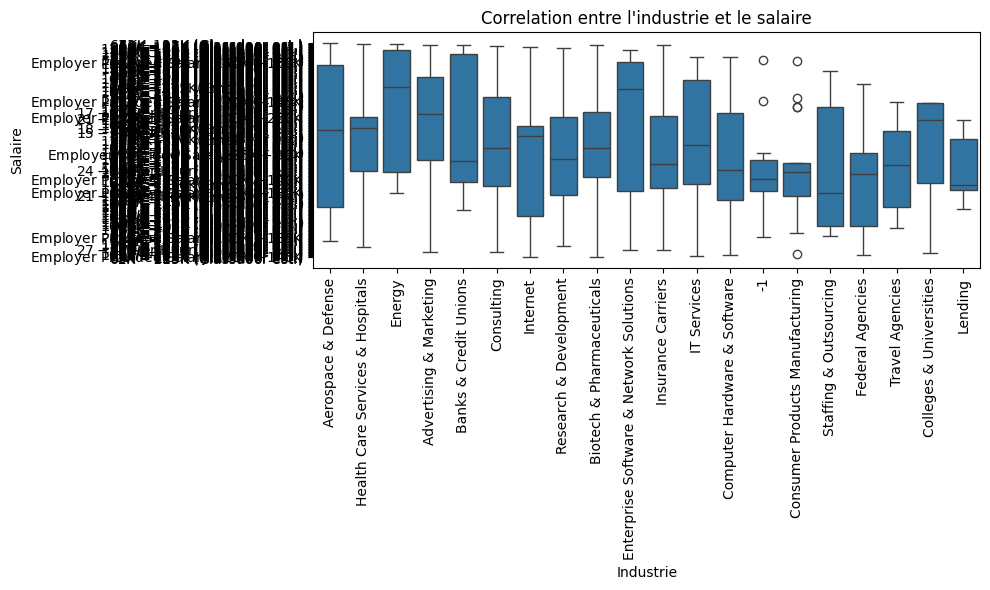

In [21]:
# 4. Correlation entre l'industrie et le salaire
plt.figure(figsize=(10, 6))
industry_job_offers = data['Industry'].value_counts().head(20).index
industry_salaries = data[data['Industry'].isin(industry_job_offers)]

sns.boxplot(x='Industry', y='Salary Estimate', data=industry_salaries)
plt.title('Correlation entre l\'industrie et le salaire')
plt.xlabel('Industrie')
plt.ylabel('Salaire')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

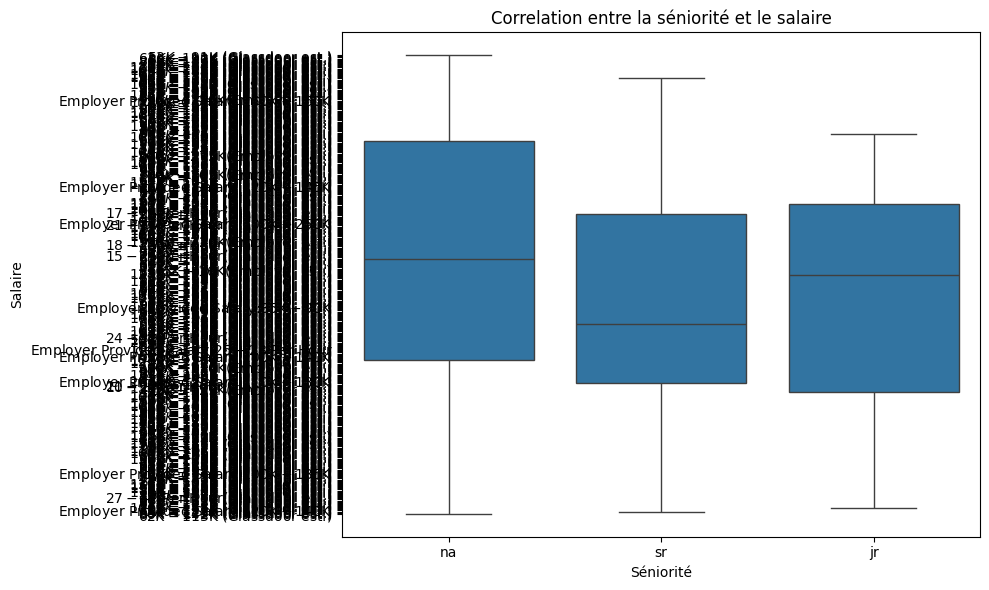

In [22]:
# 5. Correlation entre la séniorité et le salaire
plt.figure(figsize=(10, 6))
sns.boxplot(x='seniority_by_title', y='Salary Estimate', data=data)
plt.title('Correlation entre la séniorité et le salaire')
plt.xlabel('Séniorité')
plt.ylabel('Salaire')
plt.tight_layout()
plt.show()

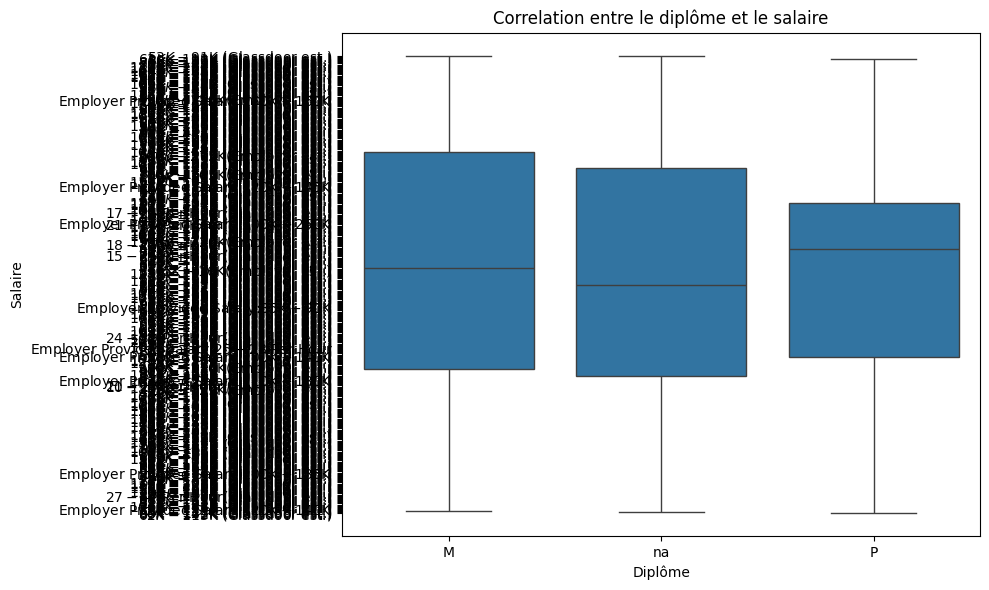

In [23]:
# 6. Correlation entre le diplôme et le salaire
plt.figure(figsize=(10, 6))
sns.boxplot(x='Degree', y='Salary Estimate', data=data)
plt.title('Correlation entre le diplôme et le salaire')
plt.xlabel('Diplôme')
plt.ylabel('Salaire')
plt.tight_layout()
plt.show()

##### 